# Water
PATRICIA JAQUEZ, 
DATE : JUNE 21, 2023

### Importing 

In [20]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
df = pd.read_csv(r'C:\Users\patty\OneDrive\Desktop\capstone_II\water_potability.csv')
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


#### Cleaning the data 

In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
df['ph'] = round(df['ph'], 2)
df['Hardness'] = round(df['Hardness'],2)
df['Solids'] = round(df['Solids'], 2)
df['Chloramines'] = round(df['Chloramines'], 2)
df['Sulfate'] = round(df['Sulfate'], 2)
df['Conductivity'] = round(df['Conductivity'], 2)
df['Organic_carbon'] = round(df['Organic_carbon'], 2)
df['Trihalomethanes'] = round(df['Trihalomethanes'], 2)
df['Turbidity'] = round(df['Turbidity'], 2)
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.10,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,333.80,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,333.80,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.67,193.68,47580.99,7.17,359.95,526.42,13.89,66.69,4.44,1
3272,7.81,193.55,17329.80,8.06,333.80,392.45,19.90,66.40,2.80,1
3273,9.42,175.76,33155.58,7.35,333.80,432.04,11.04,69.85,3.30,1
3274,5.13,230.60,11983.87,6.30,333.80,402.88,11.17,77.49,4.71,1


Changing the column names to make them easier to pull when need be 

In [18]:
col = list(df.columns)
col

df.rename(columns={
    'Hardness': 'hardness',
    'Solids':'solids',
    'Chloramines': 'chloramines',
    'Sulfate': 'sulfate',
    'Conductivity': 'conductivity',
    'Organic_carbon': 'organic_carbon',
    'Trihalomethanes': 'trihalomethanes',
    'Turbidity': 'turbidity',
    'Potability':'potability',

}, inplace=True)

df.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,7.10,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,333.80,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,333.80,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


In [21]:
df['intercept'] = 1
df.head()
# im adding an intercept which shows the point where the estimated regression line crosses the 𝑦 axis.

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability,intercept
0,7.10,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0,1
1,3.72,129.42,18630.06,6.64,333.80,592.89,15.18,56.33,4.50,0,1
2,8.10,224.24,19909.54,9.28,333.80,418.61,16.87,66.42,3.06,0,1
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0,1
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0,1


#### Note: Potability 0 means not safe to drink and 1 means it is safe to drink

# Visualizations

<Axes: xlabel='potability', ylabel='ph'>

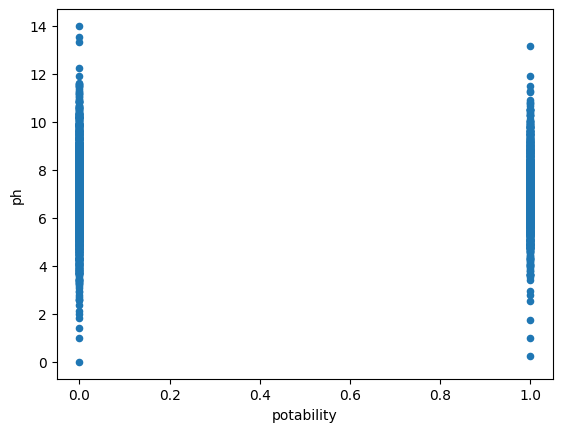

In [22]:
# Comparing the potability of water and the ph value
df.plot.scatter('potability', 'ph')

This type of scatter plot doesnt give us the right information that we need. 

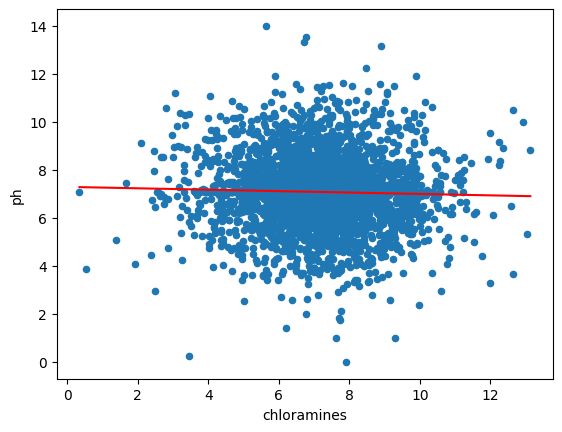

In [23]:
# Create scatter plot
ax = df.plot.scatter('chloramines', 'ph')

# Calculate line of best fit
x = df['chloramines']
y = df['ph']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)

# Add line of best fit to plot
xp = np.linspace(x.min(), x.max(), 100)
ax.plot(xp, polynomial(xp), '-', color='red')

plt.show()

learning that chloramines are needed when trying to produce the right ph balance in drinking water 